# Demo of TOAD's plotting functions

TOAD offers a few simple plotting functions to help you explore the results.


In [2]:
# Prerequisites
import numpy as np
import matplotlib.pyplot as plt
from toad import TOAD
from sklearn.cluster import HDBSCAN

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 5)

First, we run TOAD:



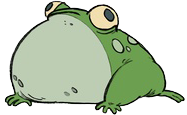

In [3]:
td = TOAD("test_data/garbe_2020_antarctica.nc", time_dim="GMST")
td.data = td.data.coarsen(x=3, y=3, GMST=3, boundary="trim").reduce(np.mean)
td

In [4]:
td.compute_clusters(
    var="thk", method=HDBSCAN(min_samples=25), shift_threshold=0.8, overwrite=True
)

INFO: Applying clusterer HDBSCAN to thk_dts
INFO: Detected 16 clusters


## `PlotConfig`

When calling `plotter()` you can pass a `PlotConfig` object with various settings to control the appearance of the plot.


In [5]:
from toad.visualisation.toad_plotter import PlotConfig

td_plotter = td.plotter(
    PlotConfig(
        grid_labels=False,
        projection="south_pole",
        map_frame=True,
        # borders=True,
        # coastline_linewidth=0.5,
        # resolution="110m",
        # border_linewidth=0.25,
        # grid_style="--",
        # grid_width=0.5,
        # grid_color="gray",
        # grid_alpha=0.5,
        # projection="plate_carree",
    )
)

## `cluster_map()`

First off, let's plot the 10 largest cluster in the antarctica data set

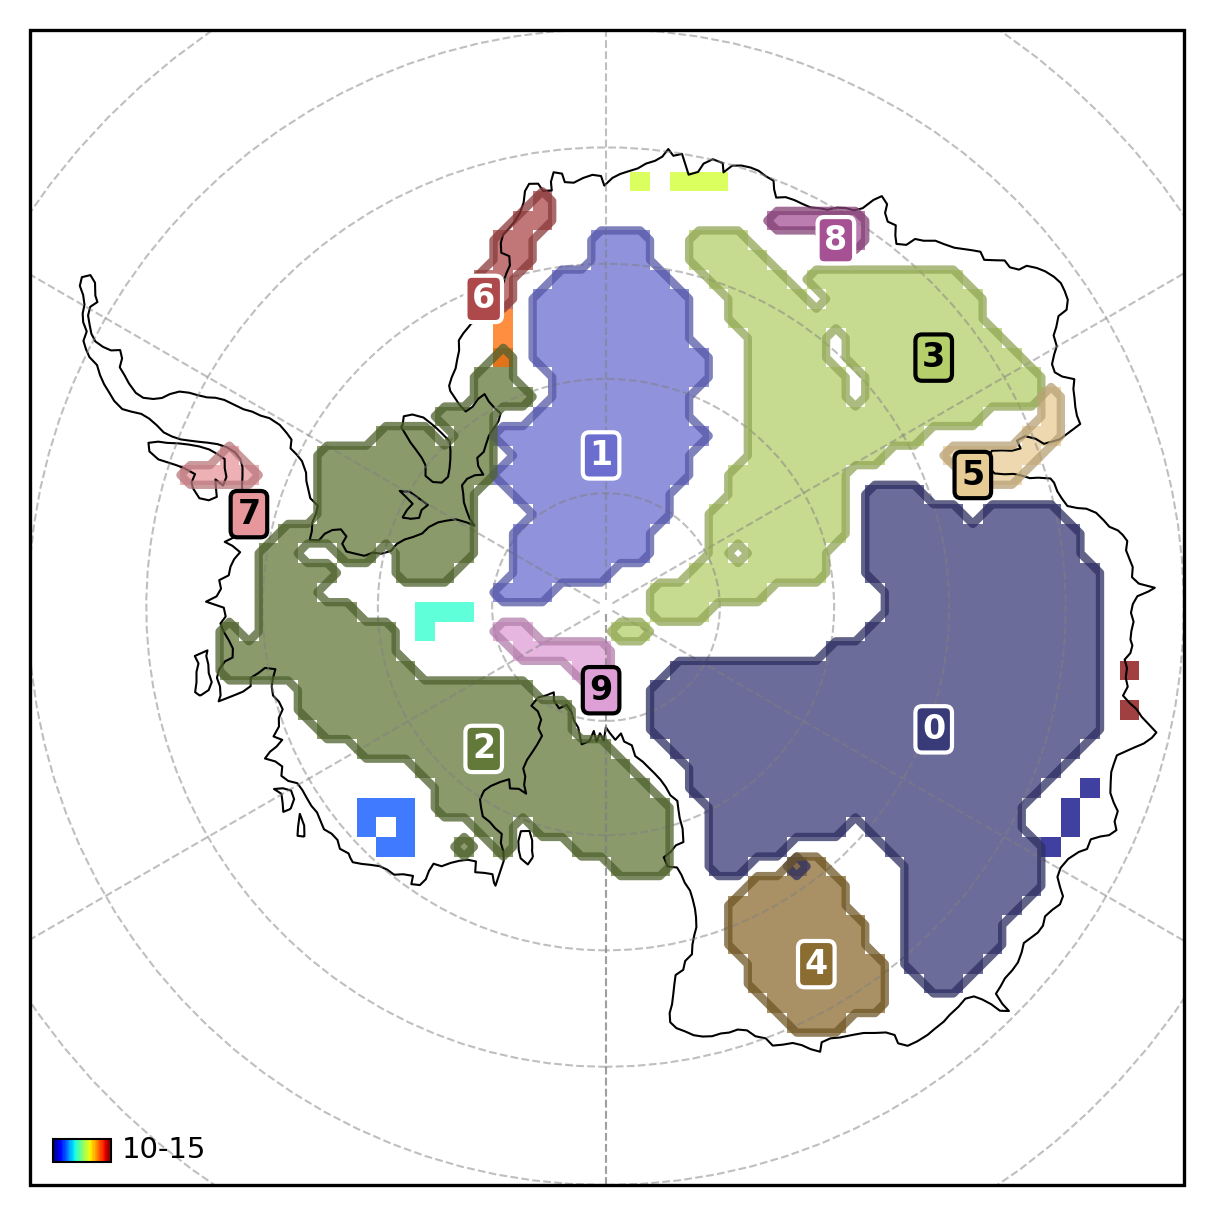

In [10]:
td_plotter.cluster_map("thk", cluster_ids=range(10));

## `cluster_maps()`

`cluster_map()` makes one map with clusters, while `cluster_maps()` puts each cluster on its own map:


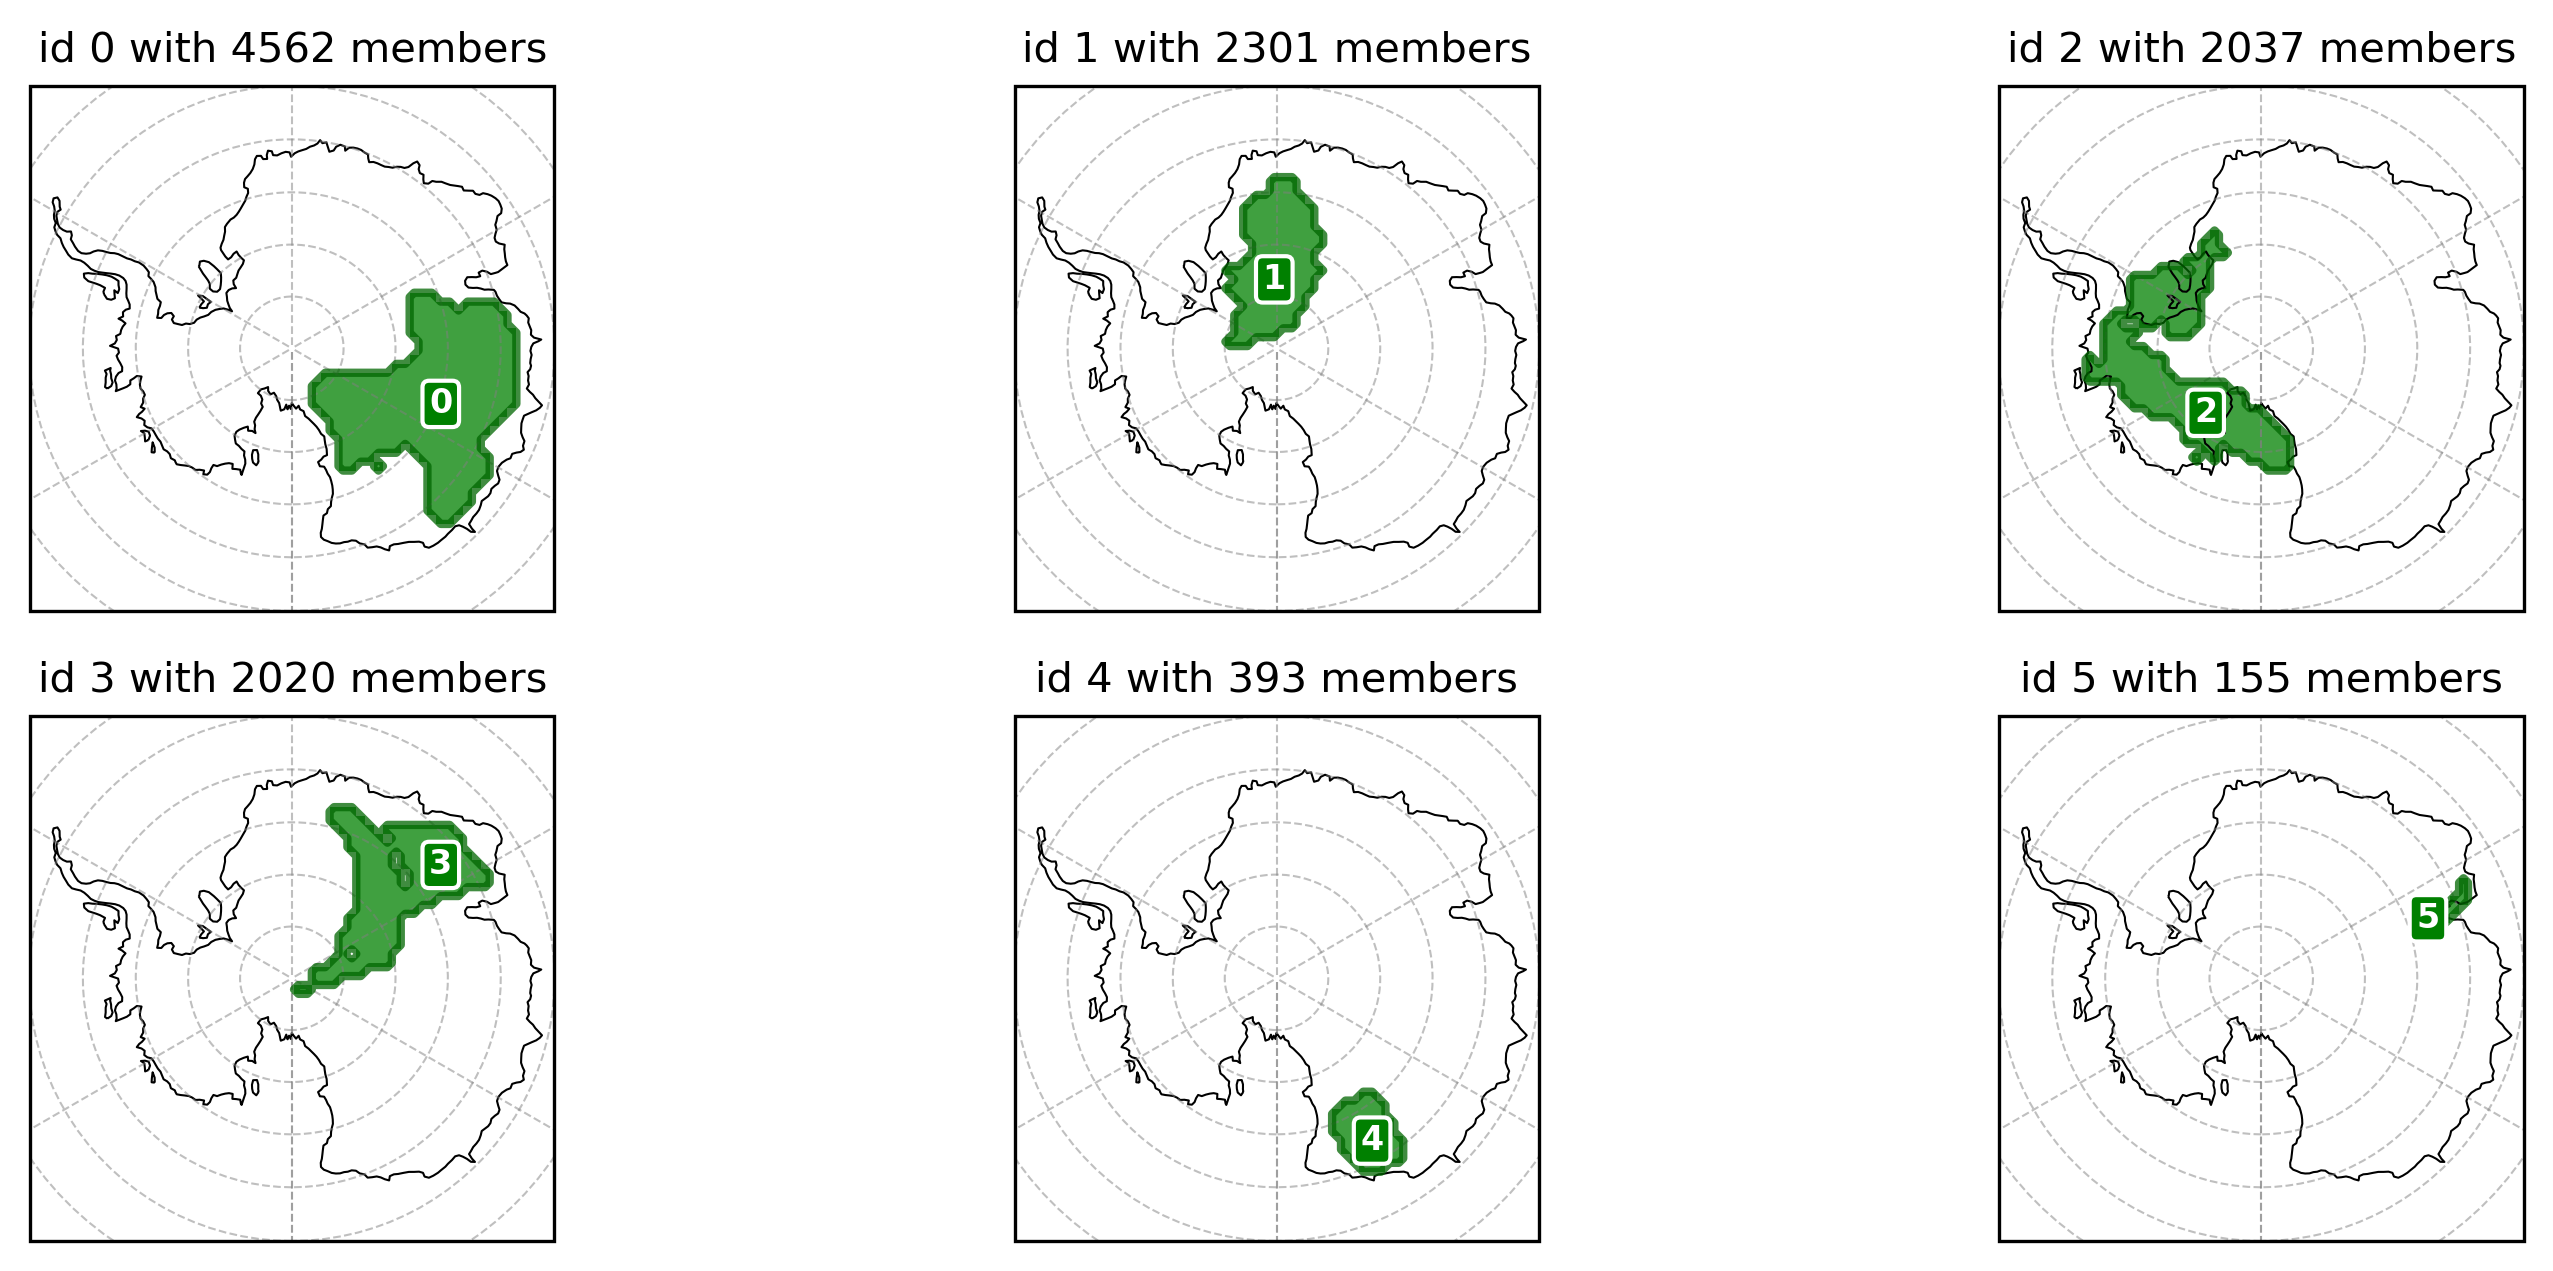

In [11]:
td_plotter.cluster_maps("thk", cluster_ids=range(6), ncols=3, color="green")

## `cluster_evolution()`

Plot the temporal evolution of a cluster:


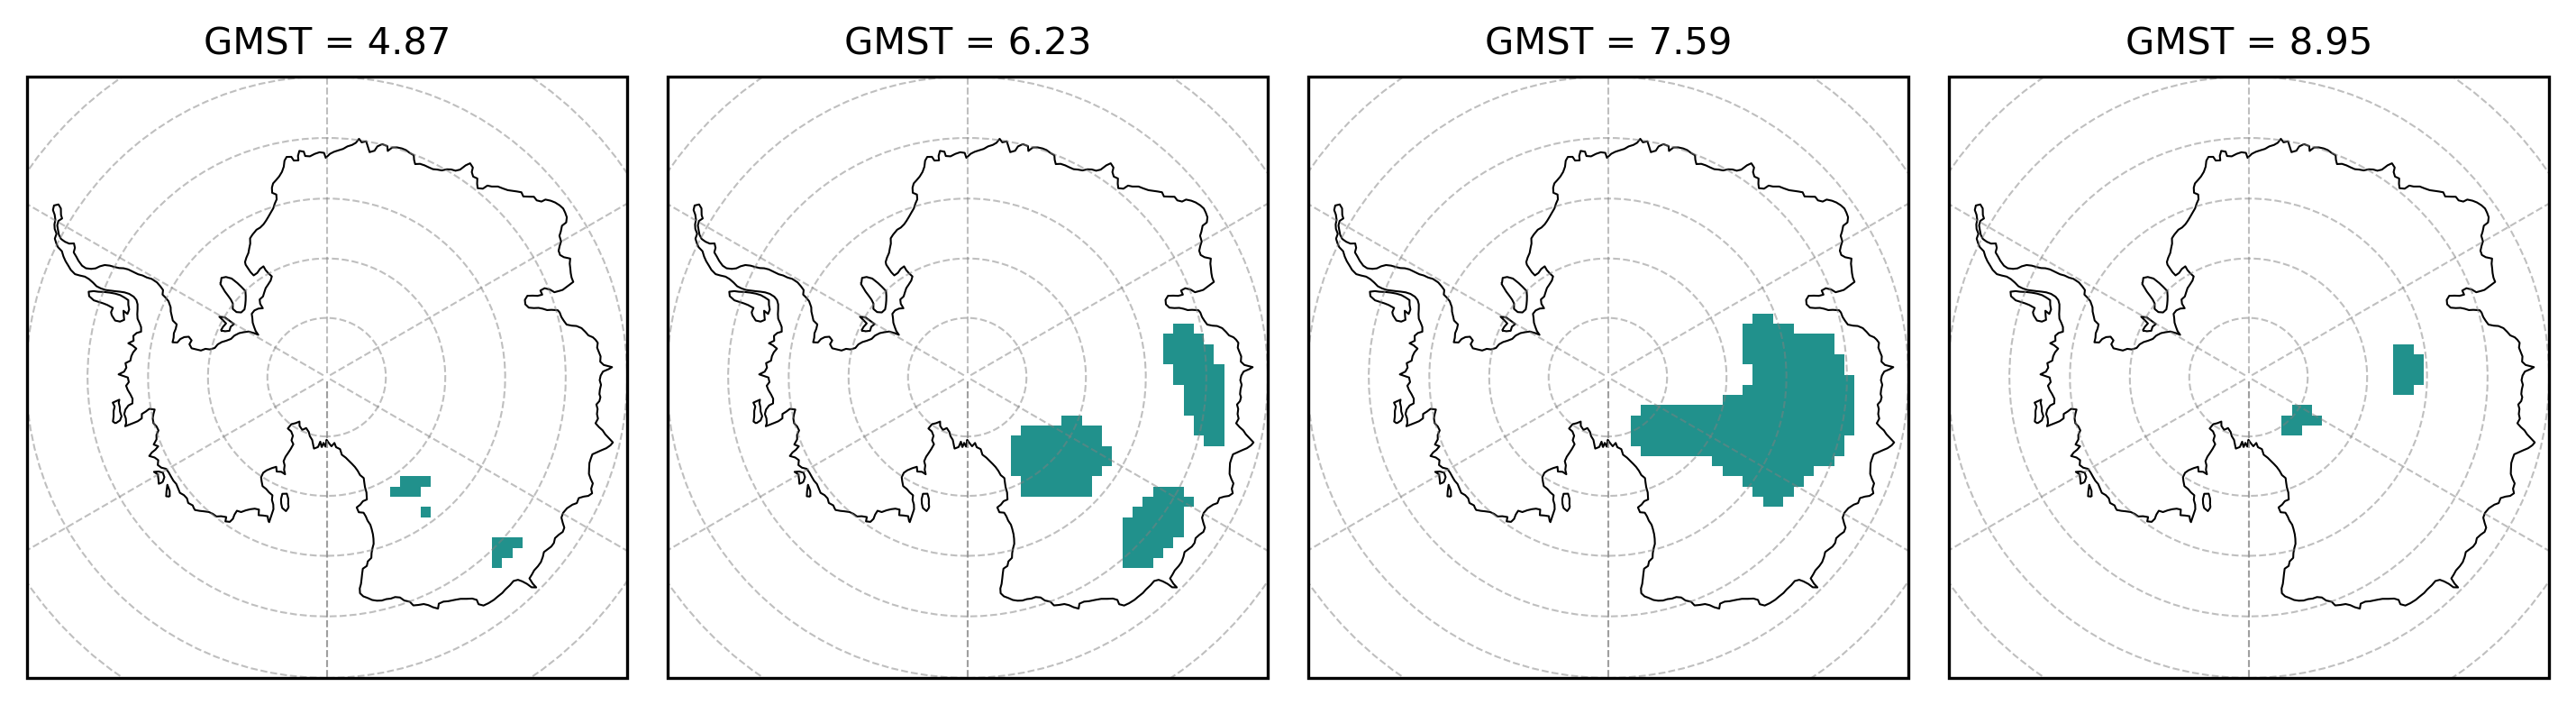

In [13]:
fig, axs = td_plotter.cluster_evolution(
    "thk",
    plot_var="thk_dts_cluster",  # specify a different variable to plot
    cluster_id=0,
    snapshots=4,
)

## `cluster_timeseries()`

Plot the timeseries of the grid cells that make up a cluster


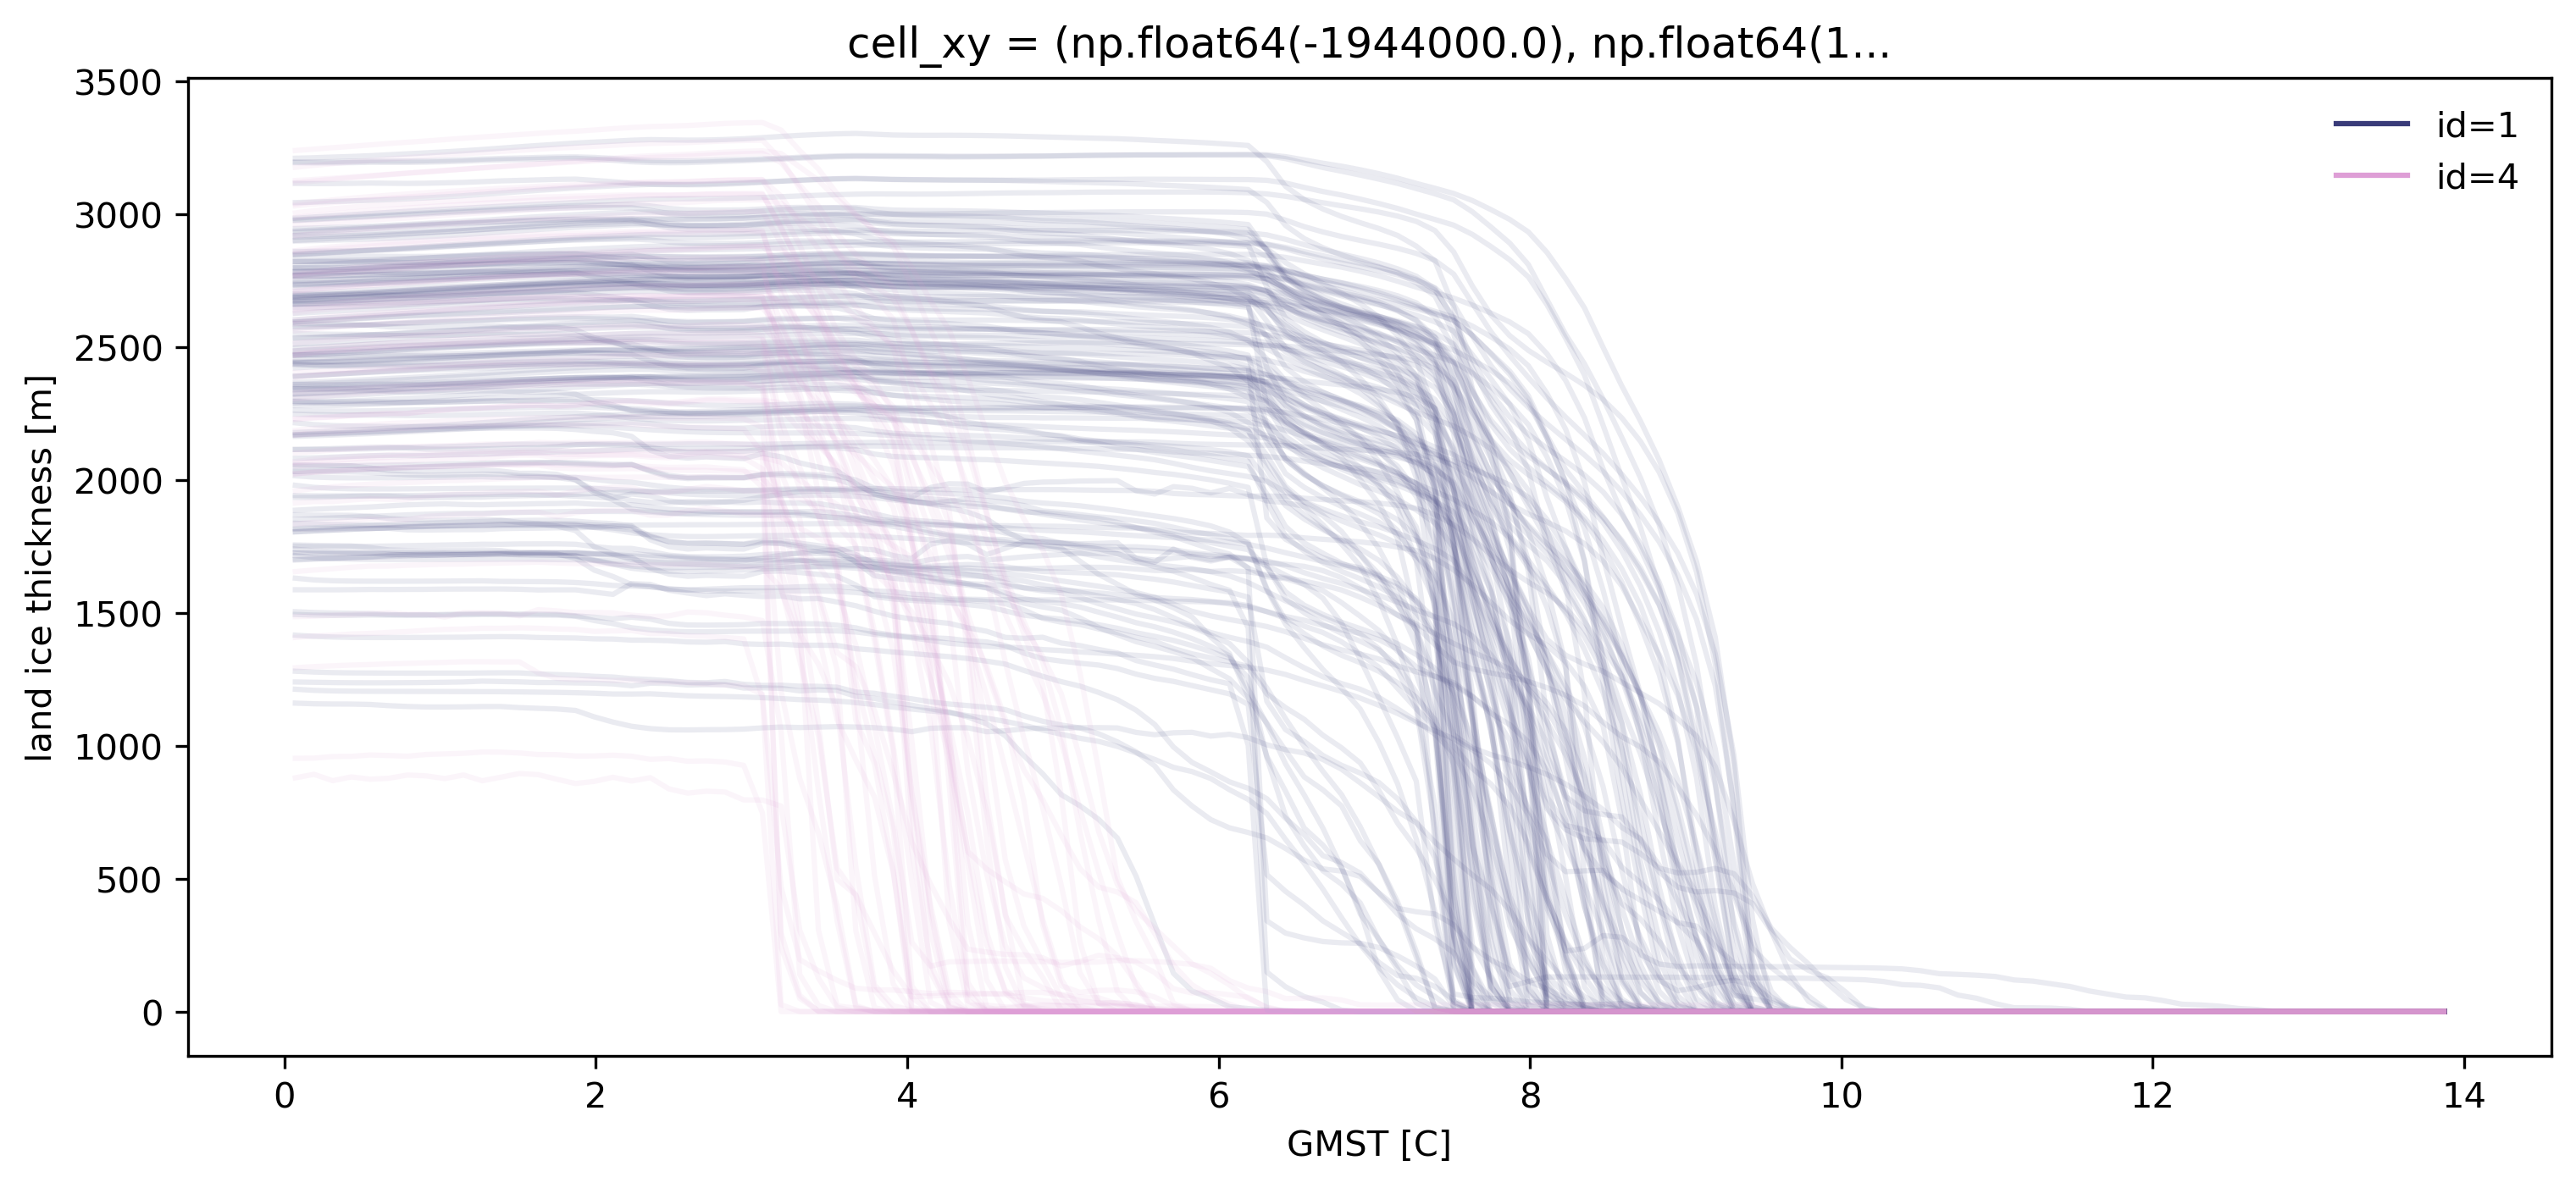

In [14]:
td_plotter.cluster_timeseries("thk", cluster_ids=[1, 4]);

## `cluster_aggregate()`

Aggregate of the timeseries.


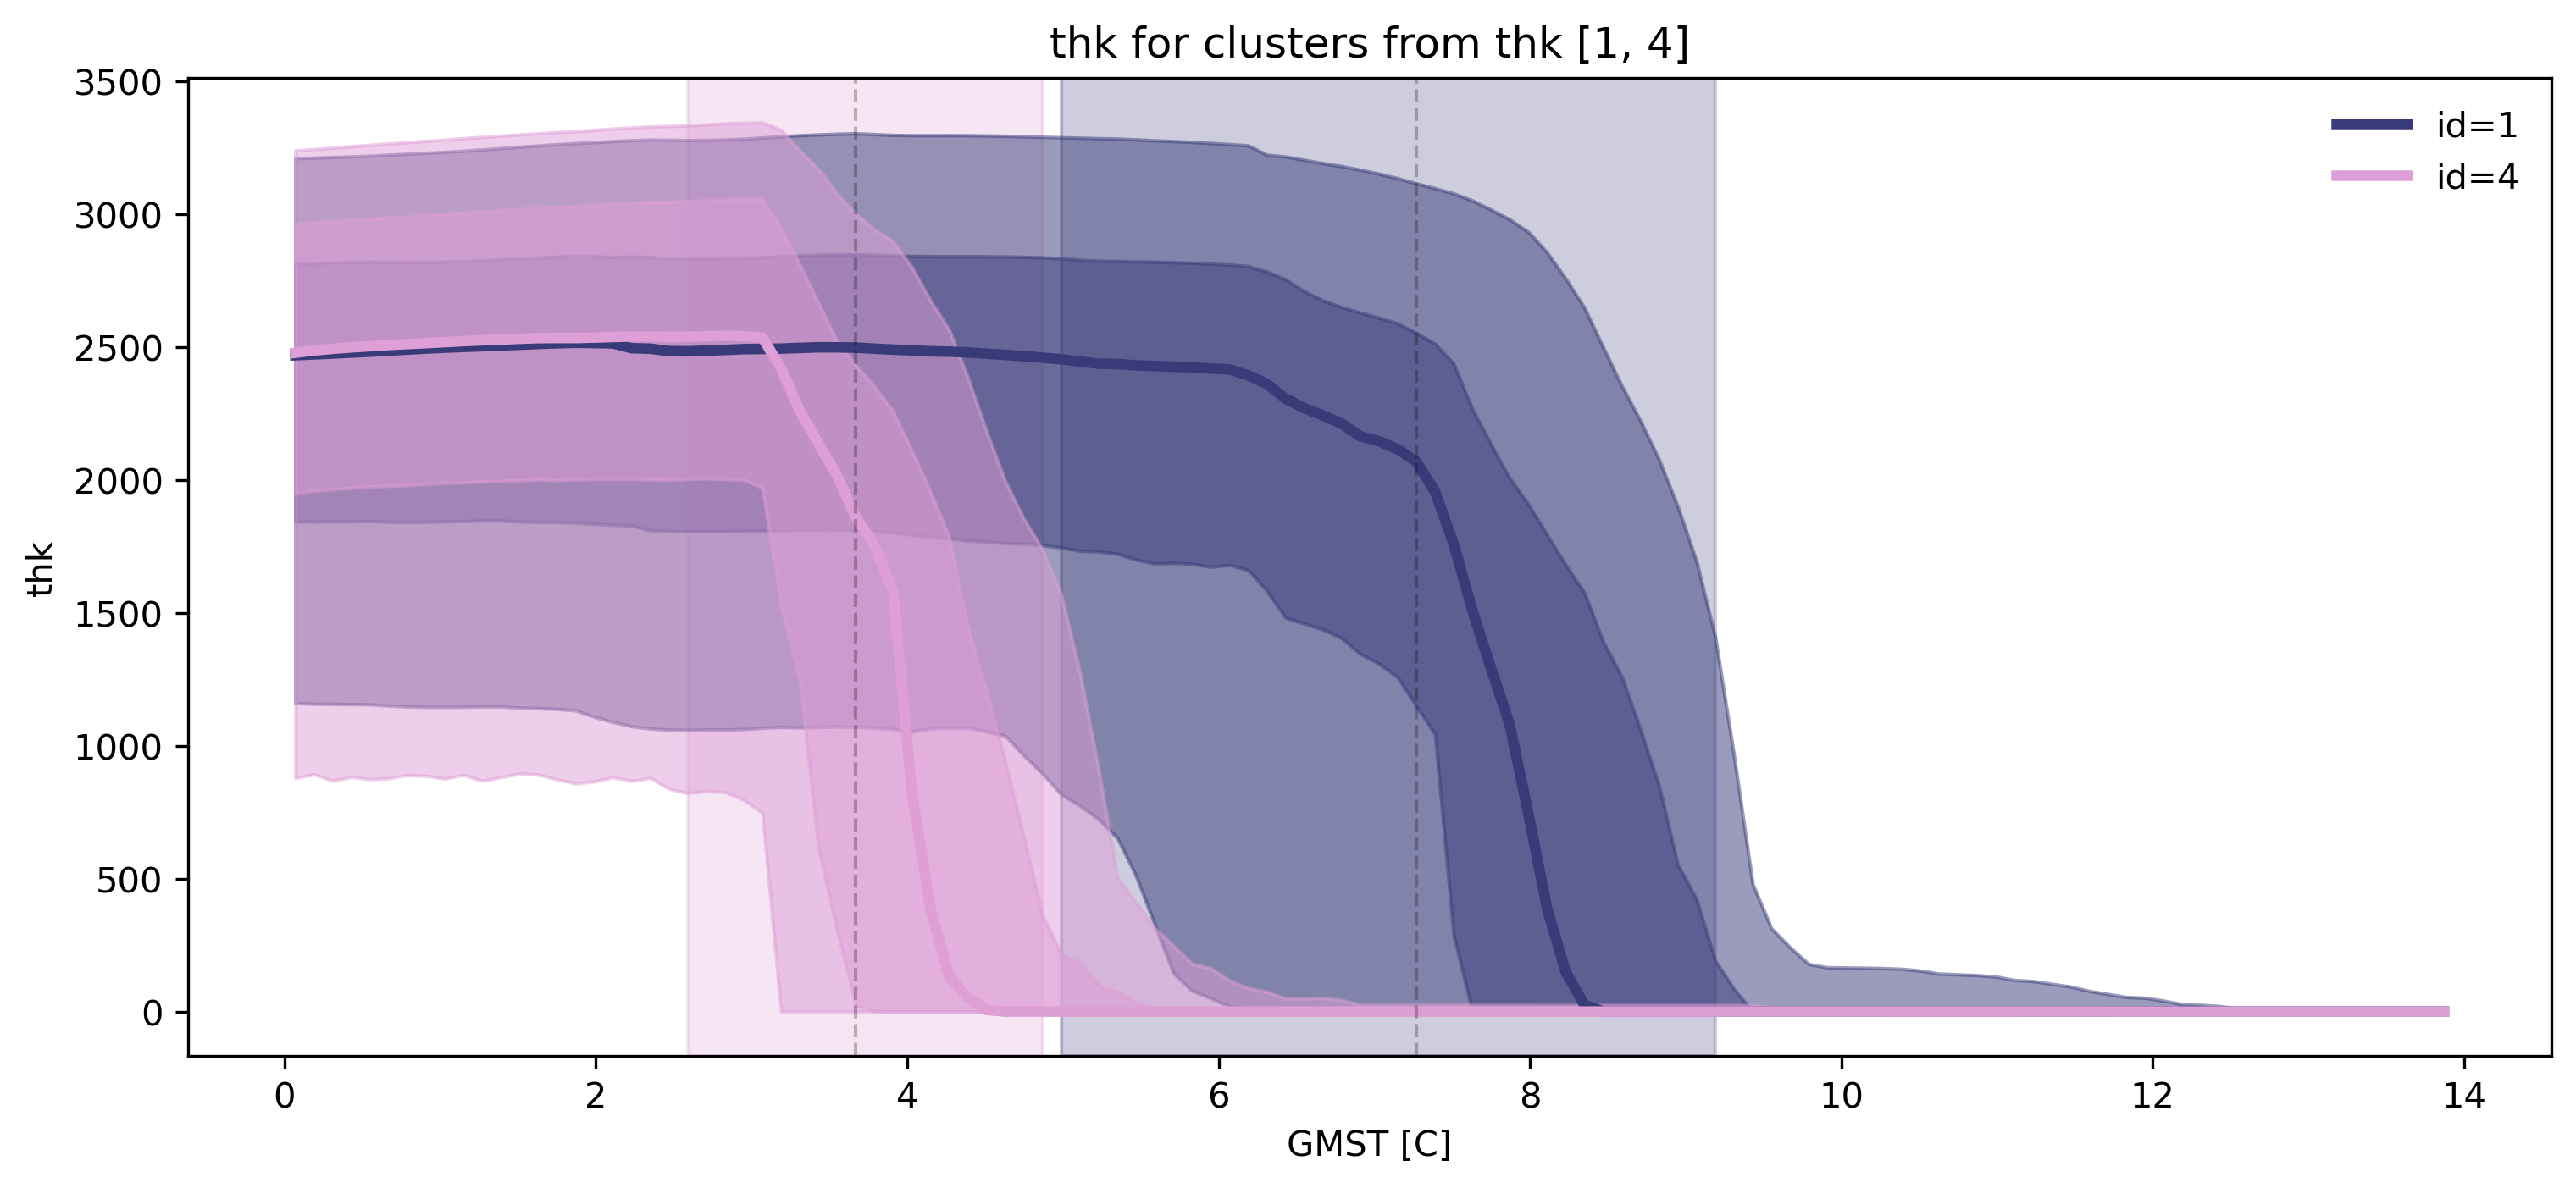

In [15]:
td_plotter.cluster_aggregate("thk", plot_var="thk", cluster_ids=[1, 4], alpha=0.5);

## `cluster_overview()`

`cluster_map()` with `cluster_aggregate()`.


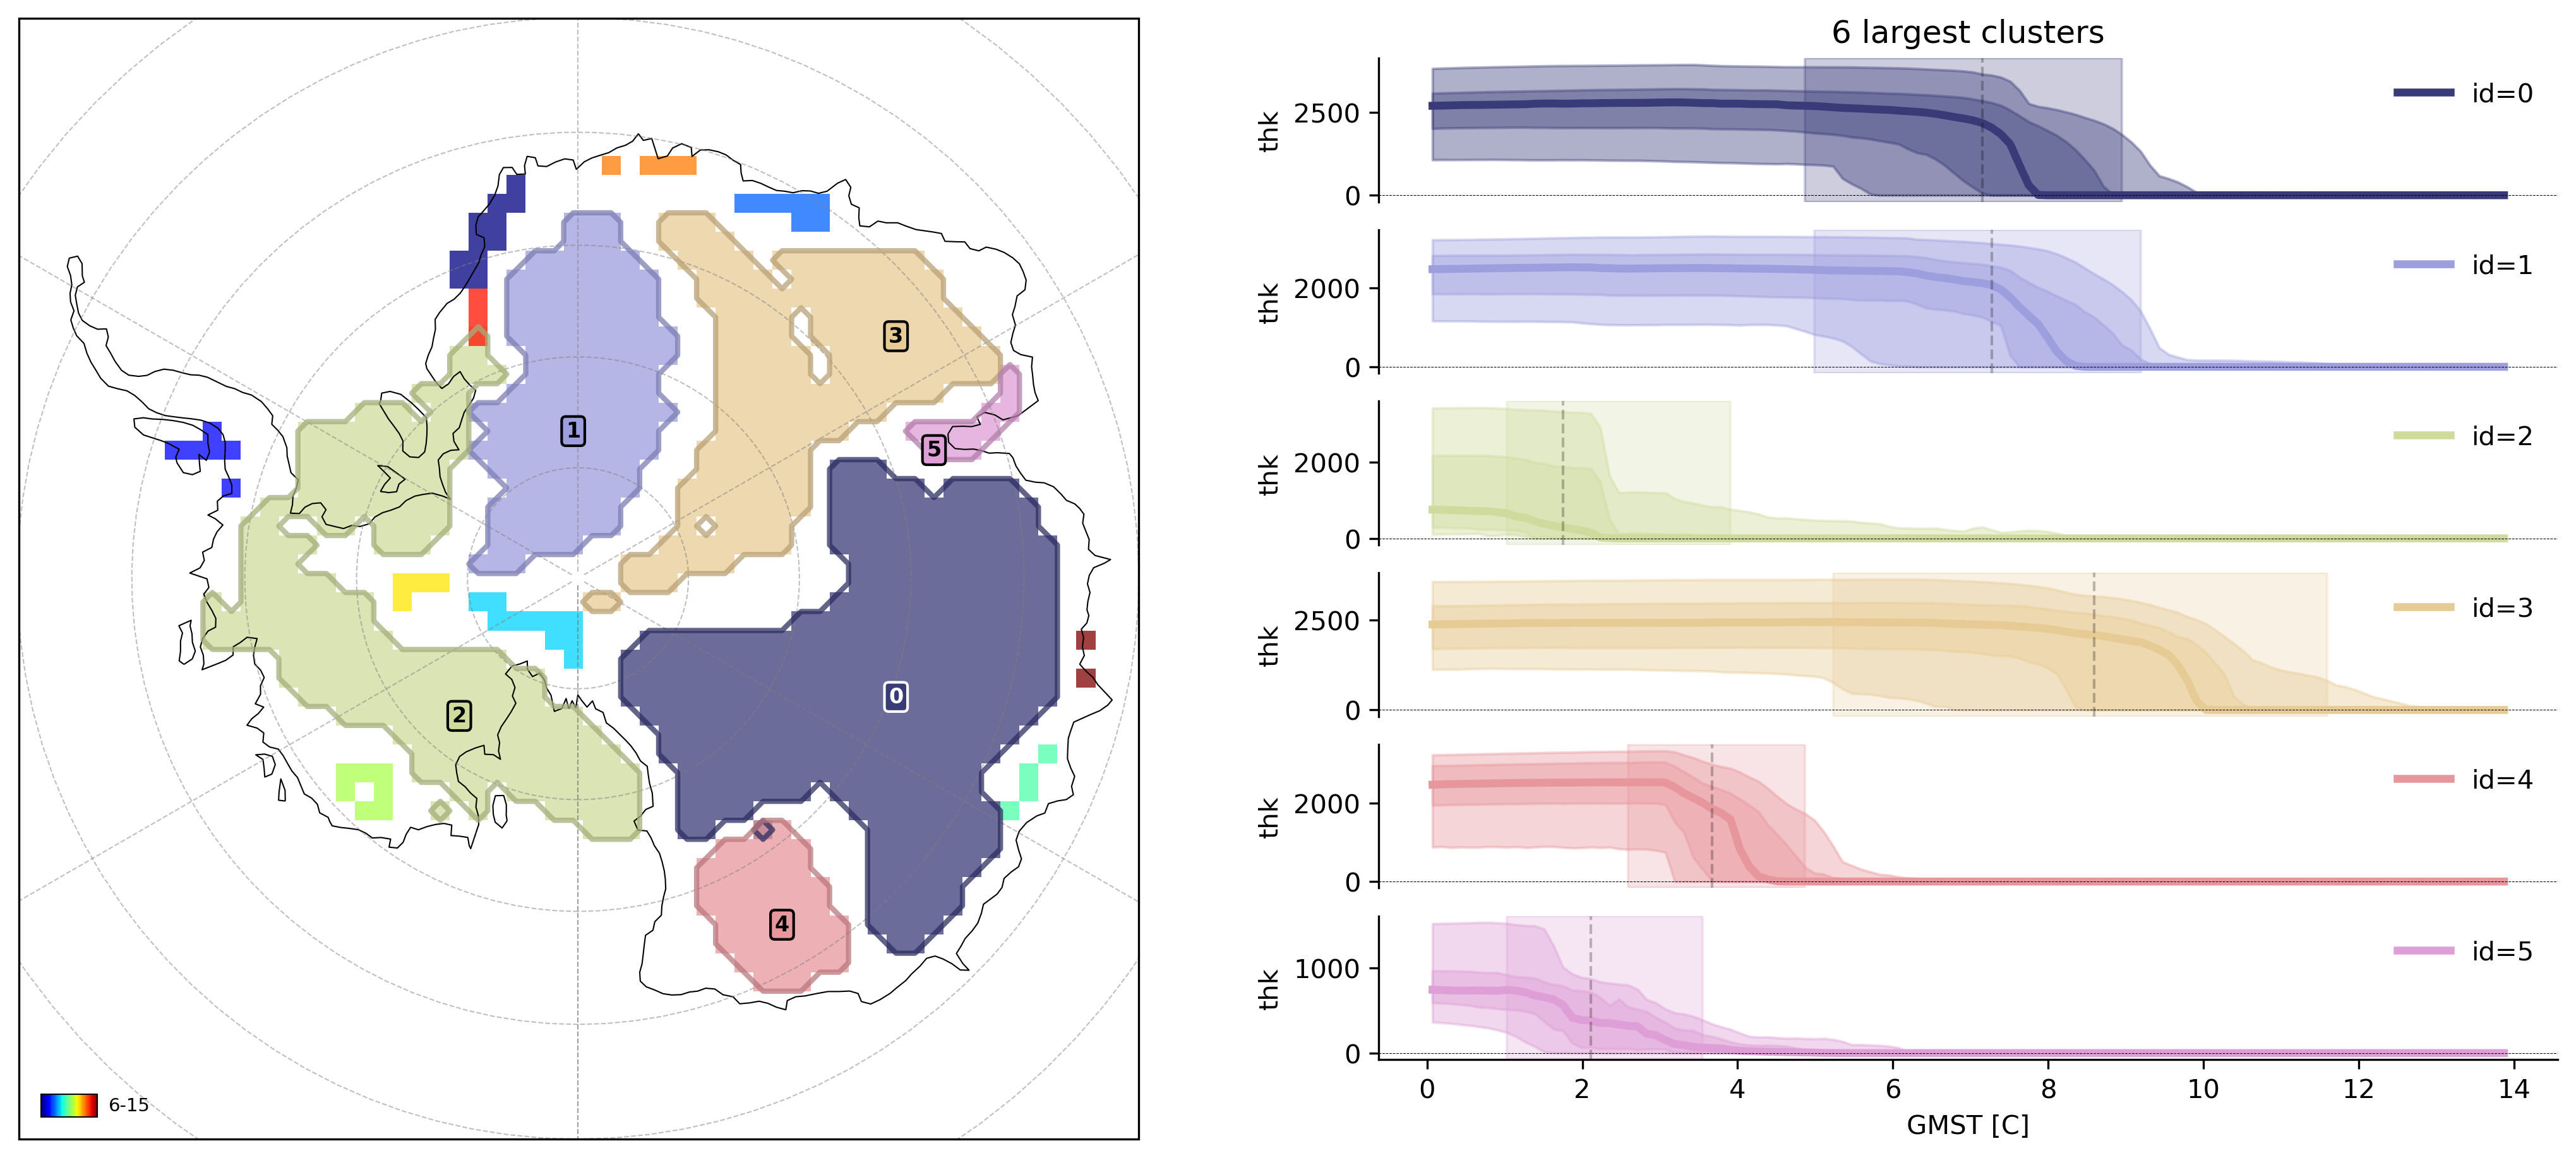

In [16]:
td_plotter.cluster_overview(
    "thk",
    range(6),  # plot the first/largest 6 clusters
    timeseries_ylabel=True,
    figsize=(14, 6),
    map_kwargs={"add_contour": True},  # all params you would add to cluster_map()
    timeseries_kwargs={},  # all params you would add to cluster_aggregate()
);

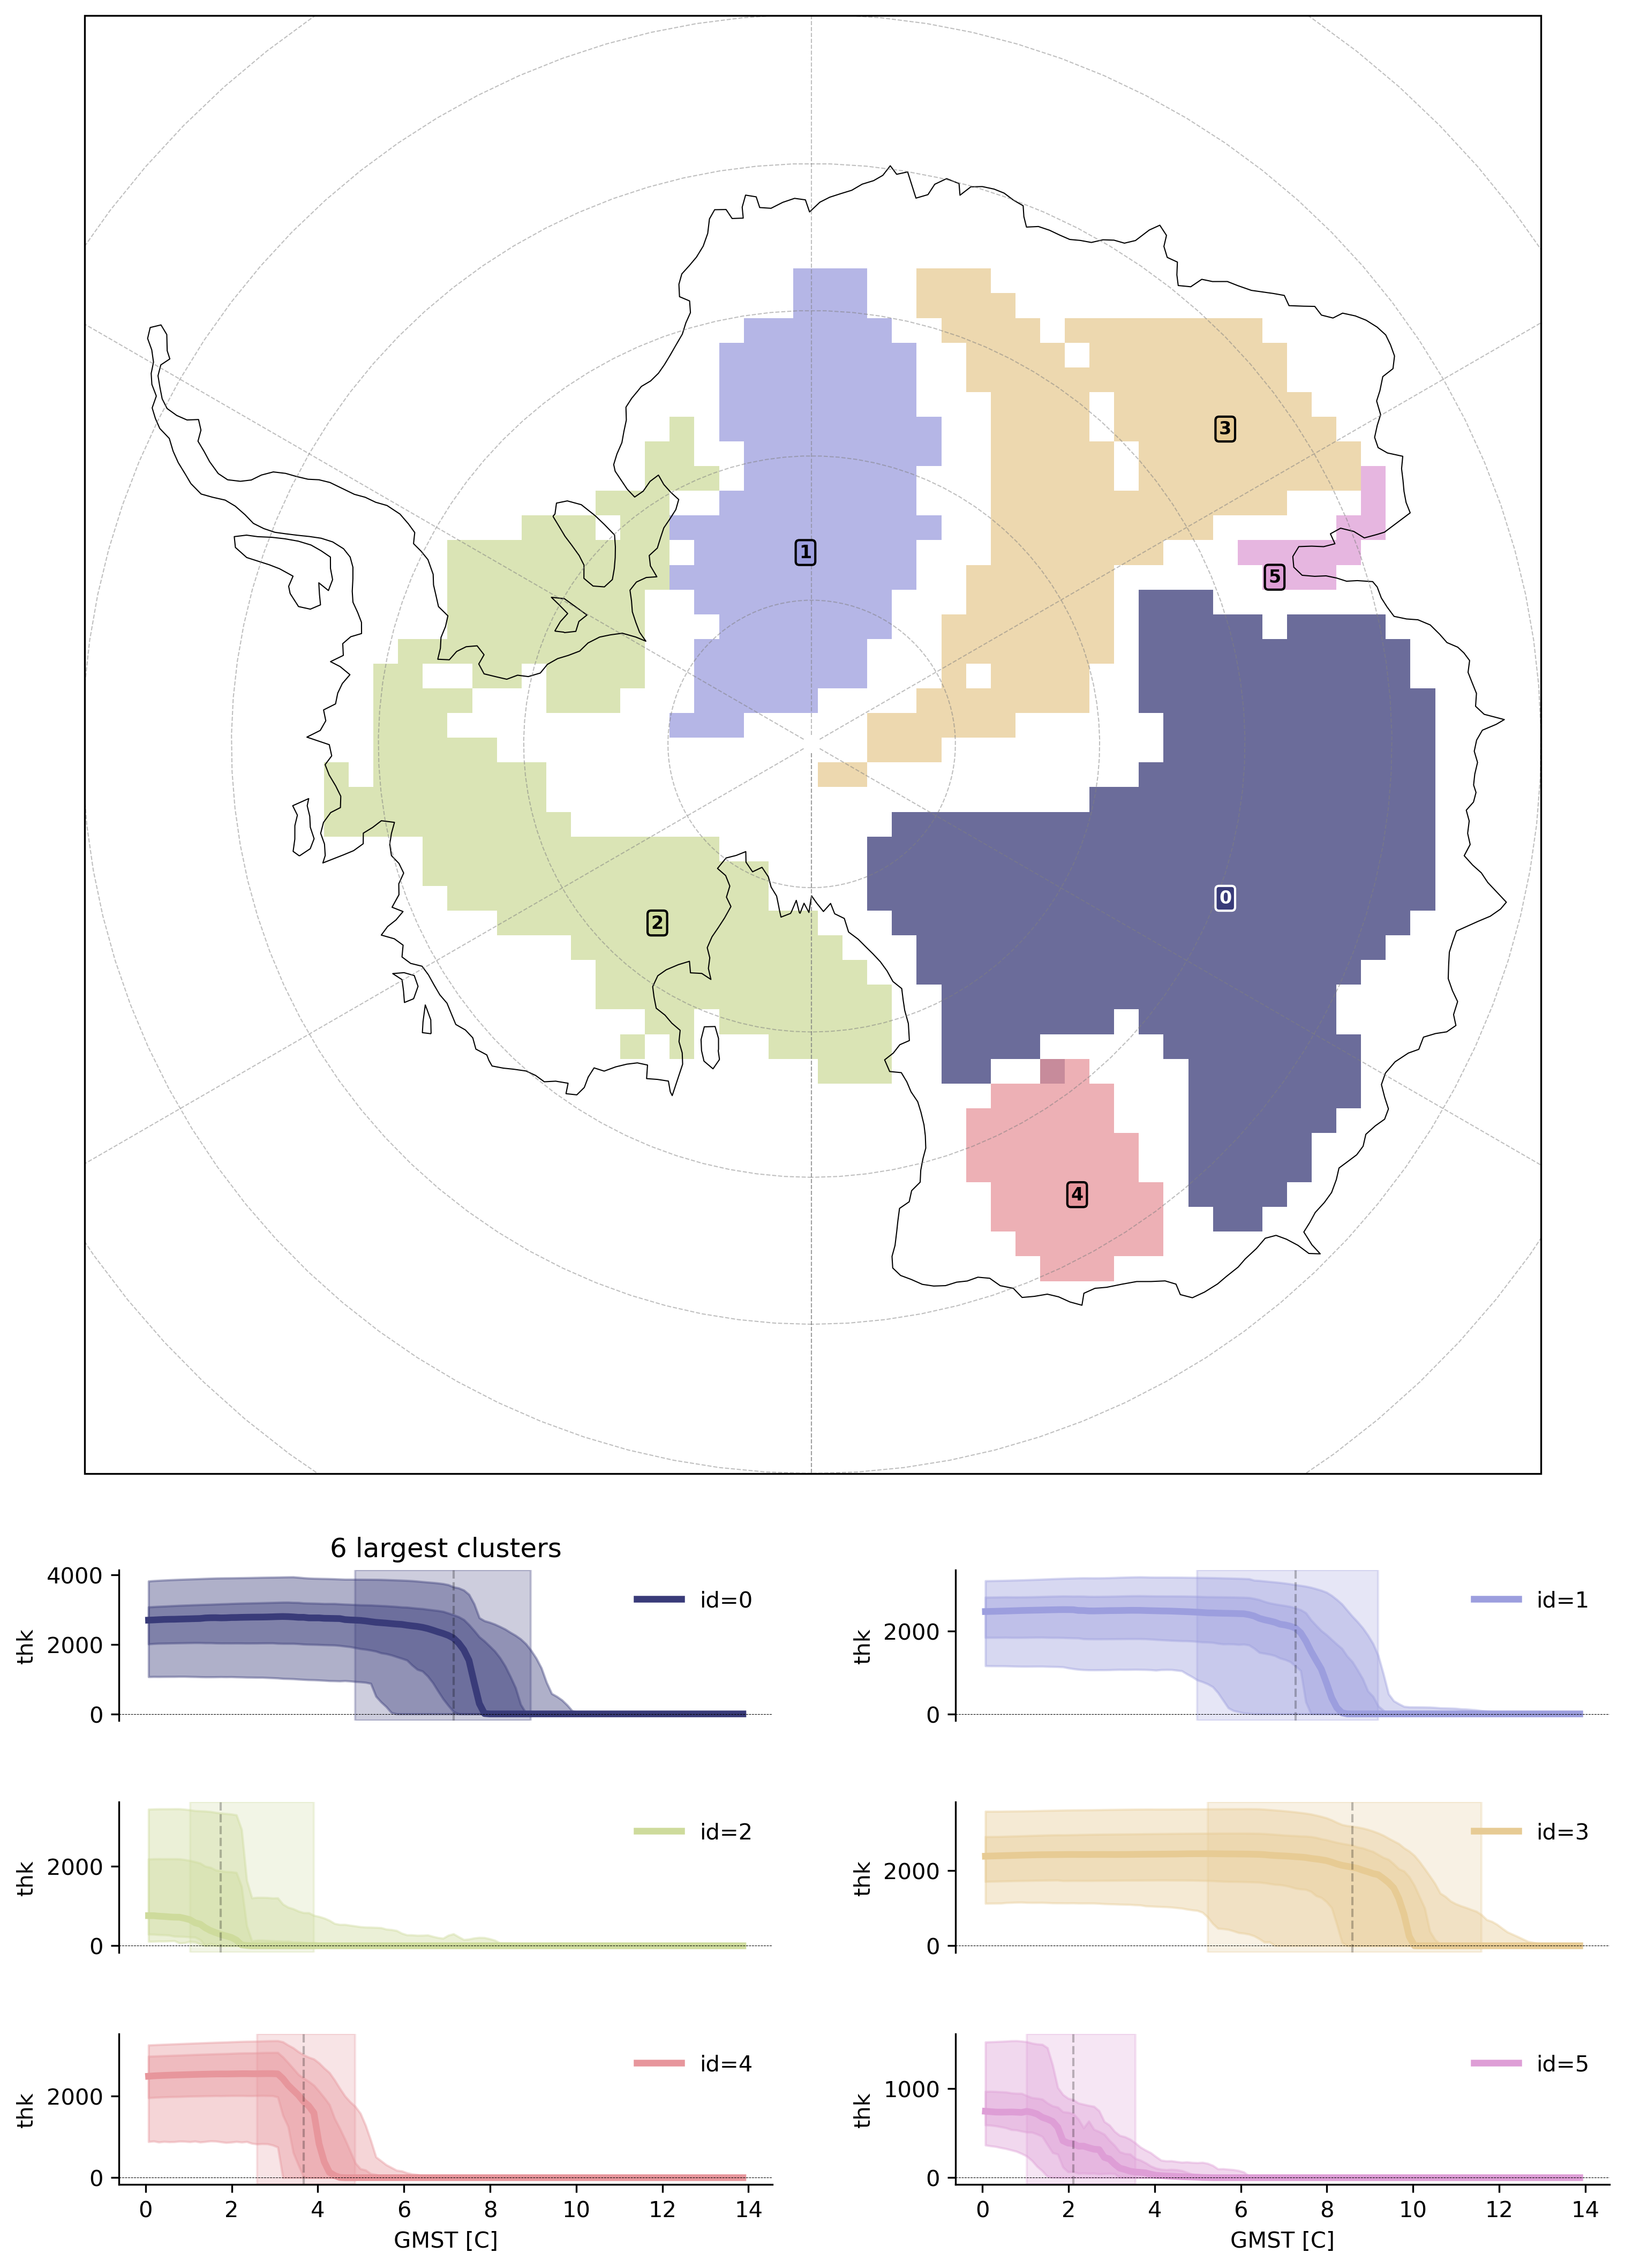

In [17]:
# Or in vertical mode
td_plotter.cluster_overview(
    "thk",
    range(6),
    timeseries_ylabel=True,
    map_kwargs={"add_contour": False, "remaining_clusters_cmap": None},
    vertical=True,
    figsize=(10, 14),
    n_timeseries_col=2,
    height_ratios=[2, 1],
);

## `cluster_cummulative()`

Plot the cumulative sum of the timeseries for one or multiple clusters.


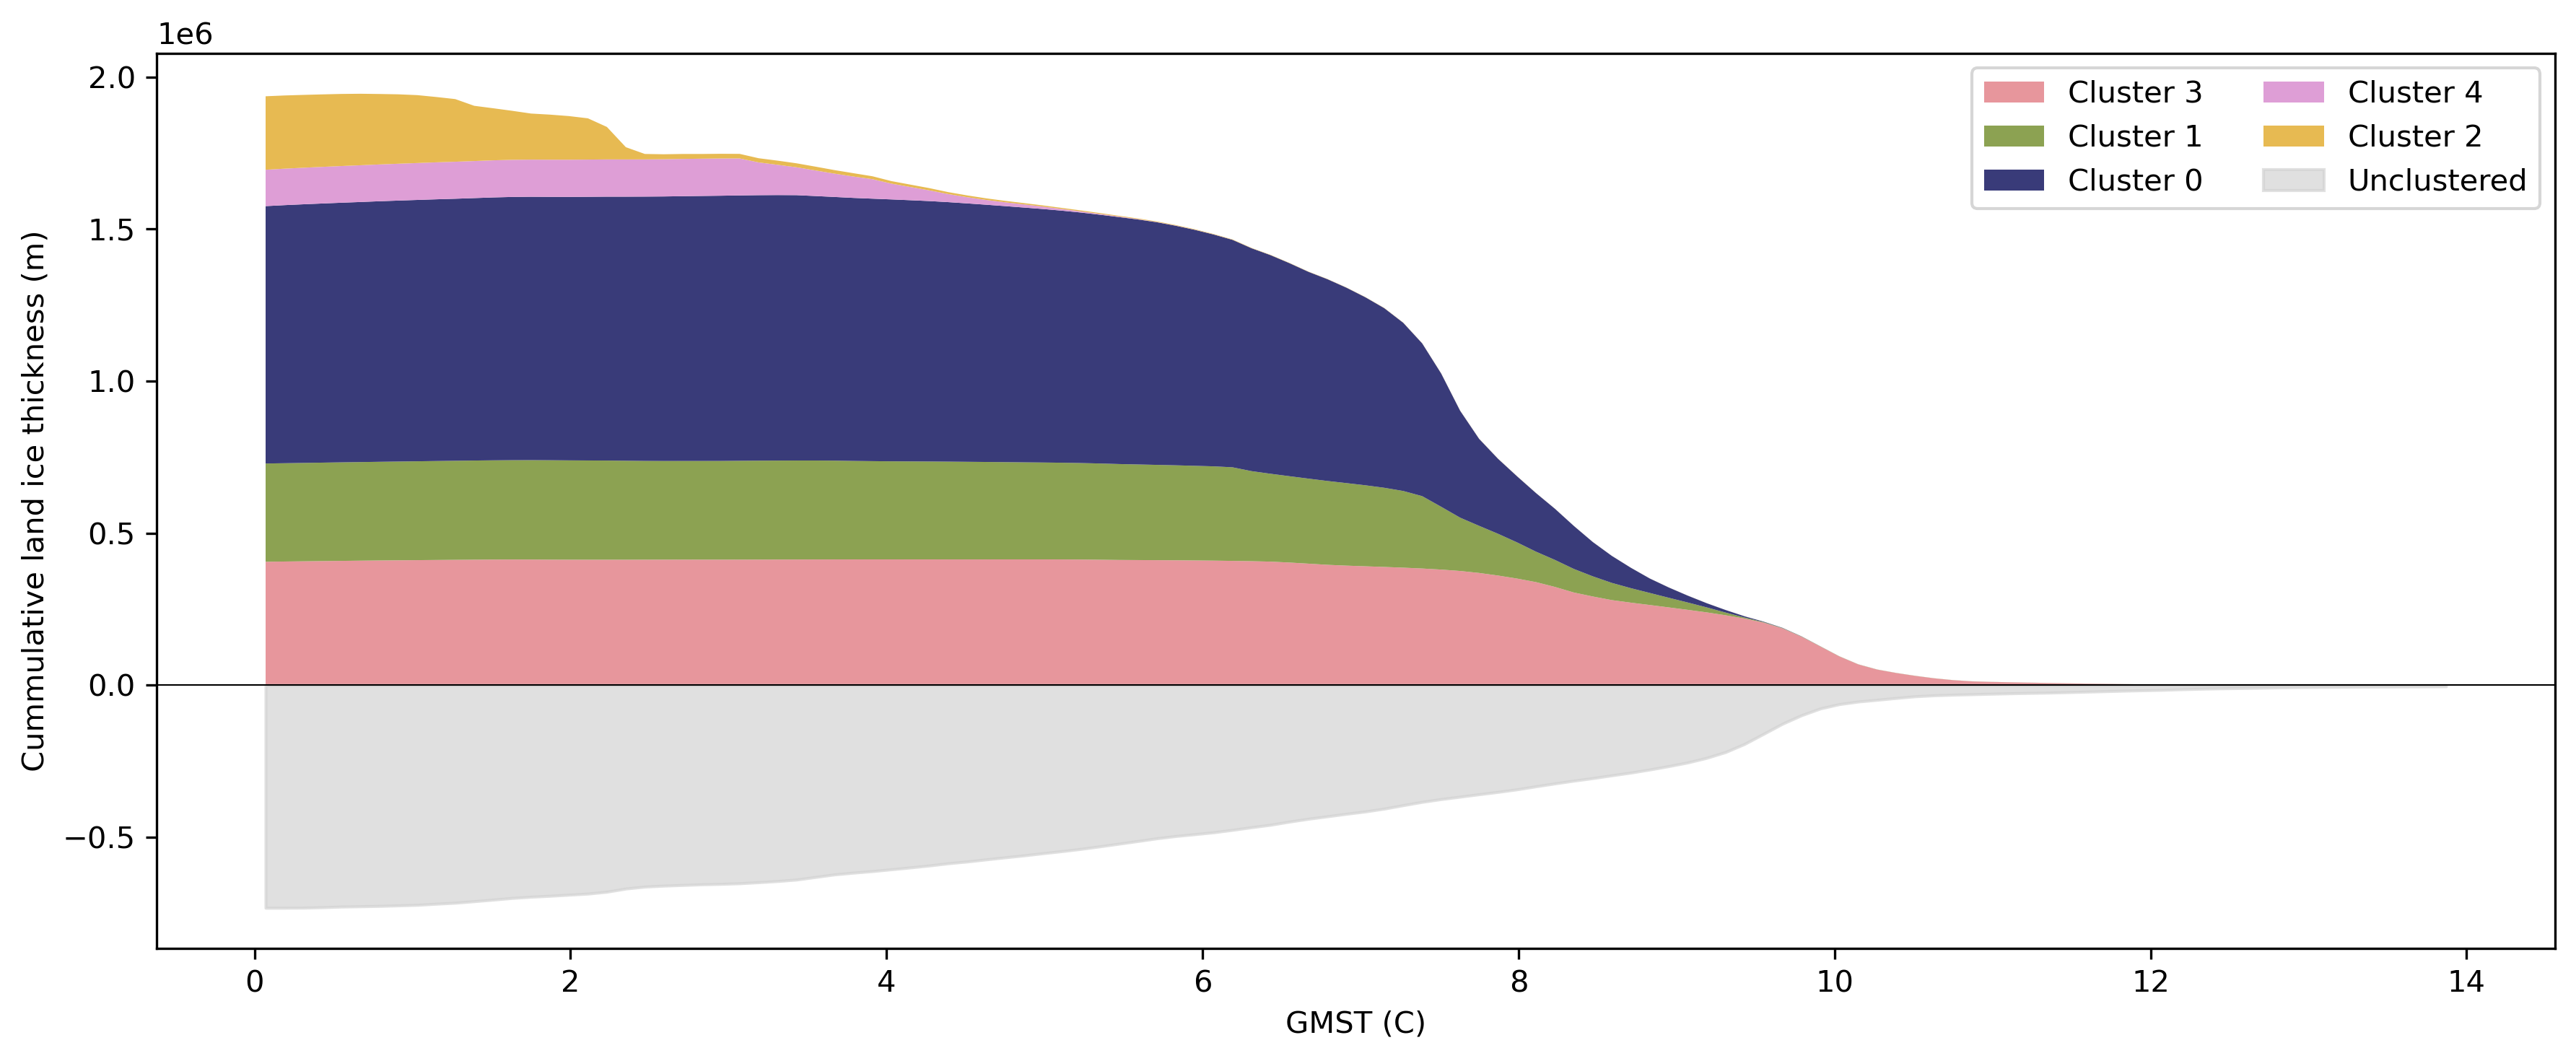

In [18]:
td_plotter.cluster_cummulative("thk", cluster_ids=range(5));